# Lab Assignment Three: Extending Logistic Regression

### Luis Garduno
## 1. Data Overview

###  1.1 Business Understanding

#### <u>`About League of Legends`<u>
    
Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer
video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue
& 'Red') facing each other, where the main objective is to destroy the opposing
teams 'Nexus', or home base, while facing obstacles like destroying damage dealing
towers & eliminating players throughout the way. Perks & gold are able to be
obtained by players/teams through completing tasks such as eliminating players,
enemy creeps, or dragons. Players then spend the gold to purchase items that help
raise the power of their abilities.

League of Legends offers different game modes, such as ranked. In this game mode,
players are given a rank based off of the number of wins + the number of games
played. "Diamond" is one of the highest ranks a player may obtain and is known
to be extremely competitive. A ranked game on average lasts 30-45 minutes. The
dataset we will be using contains the first 10 minute analytics of each team
for different diamond ranked matches.

Once the data is analyzed, third parties, or teams/players, would be able to conceptualize the level
of priority different attributes have during early stages of diamond ranked matches. With the first
ten minutes of each game being critical, they could then use this information to adjust their strategy
to one proven to win matches. In order for this data to be useful and trusted by third parties in
specific situations such as playing at professional level, the data would have to render at least a 90%
accuracy.

Additionally, players who are accustomed to playing as the 'jungle' role (a player
role that focuses on obtaining objective eliminations within the jungle areas of
the map) can use this analyzed data to better understand the impact elite monsters
have on winning games.

-------------------------------------

Dataset [Kaggle]: <a href="https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min" target="_top"><b>First 10 minutes of diamond ranked League of Legends matches</b></a>

Question Of Interest : As of the first 10 minutes, which team will win?

### 1.2 Data Preparation
#### 1.2.1 Data Description

In [1]:
import numpy as np
import pandas as pd

# Load in the dataset into dataframe X
X = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/Datasets/high_diamond_ranked_10min.csv')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

---------------------------------

Printing out the information about the dataframe we are able to see that there are a
total of 9,879 instances, and 39 attributes.

Additionally we are able to see that there are 19 of the same attributes for each
the blue & red team (columns 1-19 are the same as 20-38).

Attributes for each team includes :
- Wards placed & destroyed
- Total number of kills, deaths, & assists
- First Bloods (1st elimination of the game)
- Total : towers destroyed, gold, experience
- Average : level, CS per minute, & gold per minute
- Difference in gold & experience between the teams
- Objective eliminations : elite monsters(dragons, heralds), minions, & jungle minions

Attributes such as total gold, experience, objectives eliminations, towers destroyed, etc.
will be of type integer (int64) because they will always be whole numbers. Attributes involving
averages such as cs per minute, gold per minute, & level, should be the only of double-precision floating-point
format (float64).

The data type for "blueWins" and "first bloods" could be changed to be of type boolean, but because we are wanting to
visualize these attributes later on, optimally it is best to keep these as integer data types. As a result,
the data types presented for each attribute are correct and should not be changed.

Below is a brief description of some of the key attributes.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# describe dataframe X
X.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [3]:
X_describe = pd.DataFrame({'Features' : ['blueWins','WardsPlaced / WardsDestroyed','FirstBlood','Kills / Deaths / Assists',
                                         'TowersDestroyed','TotalGold','AvgLevel','TotalExperience','CSPerMin','GoldPerMin']})

X_describe['Description'] = ['whether blue team won or not','number of total wards placed or destroyed by team','team with the first kill of game',
                              'total number of kills, deaths, or assists of team','total number of towers destroyed by team','total gold obtained by team',
                              'average level of all players on team','total experience points accumulated by team','average creep score per minute','average gold obtained per minute']

X_describe['Feature type'] = ['Discrete','Continuous','Discrete','Continuous','Continuous','Continuous','Continuous','Continuous','Continuous','Continuous']

X_describe['Attribute Type'] = ['nominal','ratio','nominal','ratio','ratio','ratio','ratio','ratio','ratio','ratio']

X_describe['Range'] = ['0: red team won; 1: blue team won','placed: 5 - 250;destroyed: 0 - 27','0: did not get first kill; 1: team obtained first kill',
                       'kills: 0-22;deaths: 0-22;assists: 0-29','0 - 2','11,000 - 25,000','4.5 - 8.5','10,000 - 24,000','10.0 - 30.0','1,100.0 - 2,000.0']
X_describe

,Features,Description,Feature type,Attribute Type,Range
0,blueWins,whether blue team won or not,Discrete,nominal,0: red team won; 1: blue team won
1,WardsPlaced / WardsDestroyed,number of total wards placed or destroyed by team,Continuous,ratio,placed: 5 - 250;destroyed: 0 - 27
2,FirstBlood,team with the first kill of game,Discrete,nominal,0: did not get first kill; 1: team obtained fi...
3,Kills / Deaths / Assists,"total number of kills, deaths, or assists of team",Continuous,ratio,kills: 0-22;deaths: 0-22;assists: 0-29
4,TowersDestroyed,total number of towers destroyed by team,Continuous,ratio,0 - 2
5,TotalGold,total gold obtained by team,Continuous,ratio,"11,000 - 25,000"
6,AvgLevel,average level of all players on team,Continuous,ratio,4.5 - 8.5
7,TotalExperience,total experience points accumulated by team,Continuous,ratio,"10,000 - 24,000"
8,CSPerMin,average creep score per minute,Continuous,ratio,10.0 - 30.0
9,GoldPerMin,average gold obtained per minute,Continuous,ratio,"1,100.0 - 2,000.0"



---------------

#### 1.2.2 Data Quality

Using the `missingno` package, we are able to additionally confirm that all the data is complete
and there is no missing entries with the dataset. If there was missing data, we could impute the
missing values by using the k-nearest neighbor. But if an instance was missing a majority of its
attributes, it would be removed from the dataset.

The number of unique values in the column "gameId" is printed to verify that all instances
are weighted equally.

Number of unique values in column "gameId" :  9879
Duplicates :  0


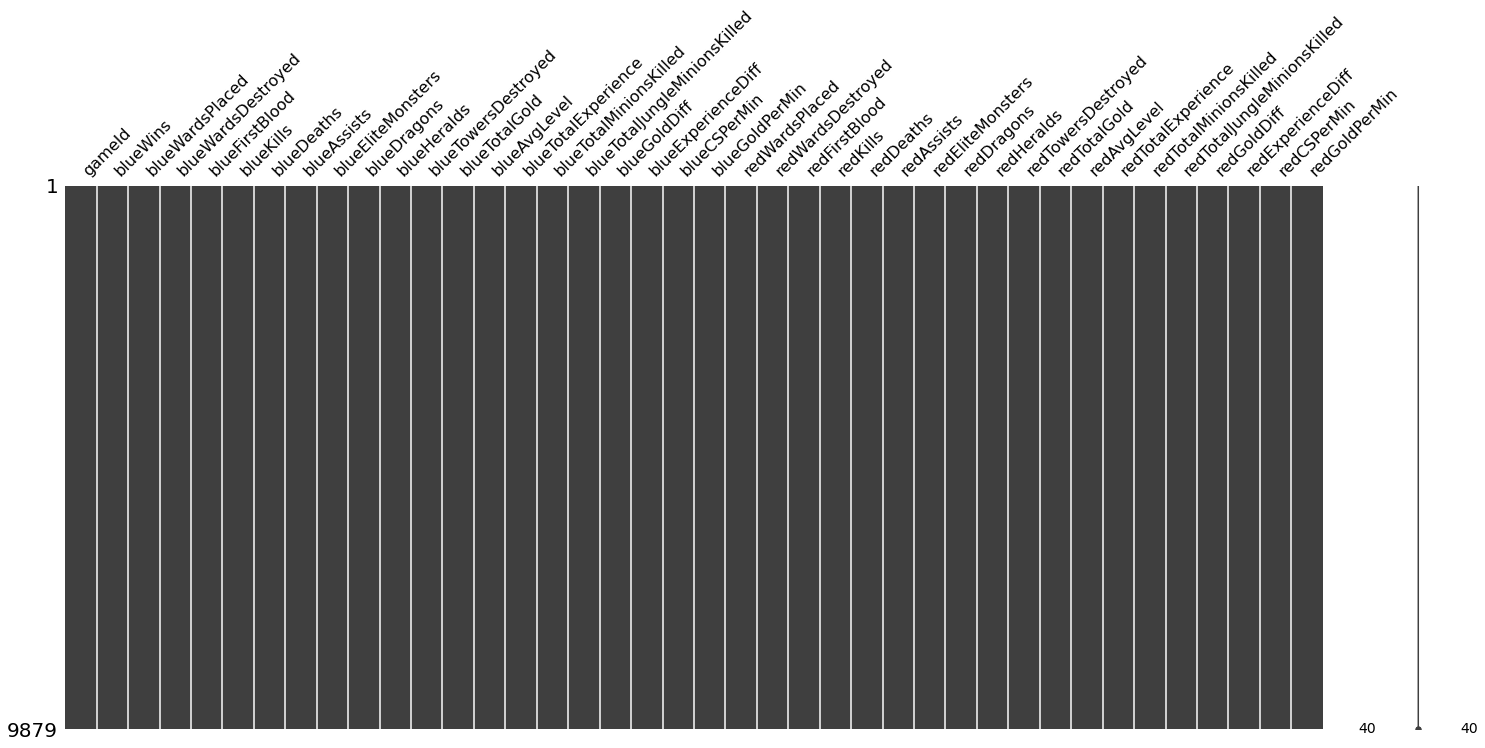

In [4]:
import missingno as mn

mn.matrix(X)

# Count unique values in column 'gameId' of the dataframe
print('Number of unique values in column "gameId" : ', X['gameId'].nunique())

dup_X = X.replace(to_replace=-1,value=np.nan)

dup_X = dup_X.duplicated()
print('Duplicates : ', len(X[dup_X]))


------------------------------

#### 1.2.3 Cleaning the Dataset

After confirming there are no duplicates in the data, the "gameId" column can be removed since it
will have no impact on the results.

Using the correlation feature from the `pandas` package, for each team we find the names of
attributes that correlate most with winning (correlation >= 7%). The names of these attributes
are stored in a array for later use.

Lastly, two dataframes are created to hold the attributes at instances when blue team wins, and
when blue team loses.

In [5]:
del X['gameId']

red_col = X.corr()[X.corr()['blueWins'] <= -0.07].index.values
blue_col = X.corr()[X.corr()['blueWins'] >= 0.07].index.values

# Create dataframes for the 2 possible outcomes :
X_win  = X[X["blueWins"]==1]     # Blue Team Win  /  Red Team Lost
X_lose = X[X["blueWins"]==0]     # Red Team Win   /  Blue Team Lost

# Finally create y, target dataframe
y = X.blueWins

# Shape of Data & Target
X.shape, y.shape

((9879, 39), (9879,))


-------------------

### 1.3 Creating Training & Test Data [30 points]
Using Scikit-learn's 
<a href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_top"><b>cross-validation modules</b></a>
we are able to split our dataset for training and testing purposes. 

In [6]:
from sklearn.model_selection import train_test_split

# Divide the data: 80% Training & 20% Testing.  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print("Training Set", "\n   - Data Shape:",X_train.shape,"\n   - Target Shape:",y_train.shape)
print("\nTesting Set","\n   - Data Shape:",X_test.shape ,"\n   - Target Shape:",y_test.shape)

Training Set 
   - Data Shape: (7903, 39) 
   - Target Shape: (7903,)

Testing Set 
   - Data Shape: (1976, 39) 
   - Target Shape: (1976,)


-------------------

We perform a split within our dataset: 80% will be used for training, and 20% for testing. The 80/20 split is appropriate for
the dataset because recall that the end goal is for users to be able to determine the probabilities of them winning their
on-going game, or in other words we will only be predicting the win probability of __ONE__ game.

Additionally if a 90/10 split was applied it would also be appropriate to use as well. With League of Legends being a
strategy based game, our prediction algorithm essentially uses the training data to find which combination of 
objectives/attributes have the biggest impact/correlation withing winning games. These game winning objectives/attributes could
be found quite early on during training, but we need to account that these objectives/attributes can be wrong in certain
instances due to the fact of the dataset only containing attributes for the first 10 minutes. So as the size of the training
set increases, the amount of fine-tunning performed increases, thus rendering a higher accuracy when predicting through the
testing dataset. 


--------------------

## 2. Modeling

### 2.1 Custom Logistic Regression Classifier [50 points]

In [7]:
# Create a custom, one-versus-all logistic regression classifier using numpy & scipy to optimize.
# - Use OOConventions identical to scikit-learn.
# - Start w/ the template developed in class.
# - Add the following functionality to the logistic regression classifier:
#      - Ability to choose optimization technique when class is instantiated between either: 
#            - steepest descent,
#            - stochastic gradient descent,
#            - Newton's method.
#      - Update the gradient calculation to include a customizable regularization term
#        (either : no regularization, L1 regularization, L2 regularization, or both L1 & L2 regularization).
#        Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated. 


----------------------

### 2.2 Custom Classifier Training [65 points]


In [8]:
 # Train my classifier to achieve good generalization performance.
    
 # That is, adjust the optimization technique & the value of the regularization term "C" to achieve the best
 # performance on my test set.

In [9]:

# Visualize the performance of the classifier versus the parameters you investigated.



- Is my method of selecting parameters justified?
- That is, do I think there is any "data snooping" involved w/ this method of selecting parameters?


------------------------------

### 2.3 Comparing Classifier Performance [80 Points]

- Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn.

In [10]:
 
# Visualize the performance differences in terms of training time and classification performance.
    


- Discuss the results.



------------------------

## 3. Deployment [90 points]
- Which implementation of logistic regression would I advise be used in a deployed machine learning model, my implementation or scikit-learn (or other third party)? Why?


----------------------------

### 4. Logistic Regression Optimization [100 points]

In [11]:
# Idea 1: Update the code to use either "one-versus-all" or "one-versus-one" extensions of binary to multi-class
#         classification.
# Idea 2: Implement an optimization technique for logistic regression using MSE as my obj func (instead of binary entropy).
#         My solution should be able to solve the binary logistic regression problem in one update step. 


---------------------

#### References


Kaggle. League of Legends Diamond Ranked Games (First 10 Minutes).
https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min (Accessed 9-10-2020)

Scikit-learn. Cross-validation. https://scikit-learn.org/stable/modules/cross_validation.html (Accessed 10-10-2020)
